In [5]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print(input_train.shape)
print(input_test.shape)

(25000, 500)
(25000, 500)


## 간단한 순환 네트워크

In [12]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN,Dense

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

C:\Users\opp06\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 82s 4ms/step - loss: 0.5565 - acc: 0.7175 - val_loss: 0.5271 - val_acc: 0.7268
Epoch 2/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.3535 - acc: 0.8558 - val_loss: 0.3706 - val_acc: 0.8424
Epoch 3/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.2820 - acc: 0.8860 - val_loss: 0.3509 - val_acc: 0.8514
Epoch 4/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.2297 - acc: 0.9104 - val_loss: 0.3549 - val_acc: 0.8556
Epoch 5/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.1927 - acc: 0.9290 - val_loss: 0.7452 - val_acc: 0.7612
Epoch 6/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.1523 - acc: 0.9450 - val_loss: 0.4728 - val_acc: 0.7962
Epoch 7/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.1033 - acc: 0.9646 - val_loss: 0.4541 - val_acc:

range(1, 11)


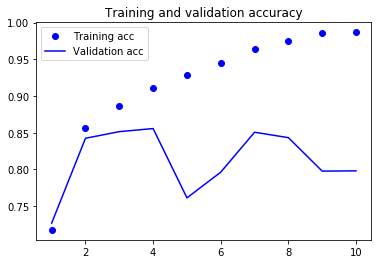

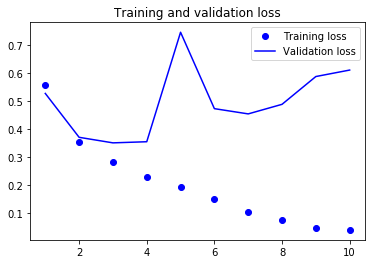

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)
print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(input_train,y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

C:\Users\opp06\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 259s 13ms/step - loss: 0.4898 - acc: 0.7715 - val_loss: 0.4203 - val_acc: 0.8328
Epoch 2/10
20000/20000 [==============================] - 243s 12ms/step - loss: 0.2852 - acc: 0.8880 - val_loss: 0.3335 - val_acc: 0.8780
Epoch 3/10
20000/20000 [==============================] - 259s 13ms/step - loss: 0.2286 - acc: 0.9132 - val_loss: 0.3366 - val_acc: 0.8648
Epoch 4/10
20000/20000 [==============================] - 277s 14ms/step - loss: 0.1988 - acc: 0.9279 - val_loss: 0.3114 - val_acc: 0.8884
Epoch 5/10
20000/20000 [==============================] - 261s 13ms/step - loss: 0.1761 - acc: 0.9380 - val_loss: 0.2909 - val_acc: 0.8874
Epoch 6/10
20000/20000 [==============================] - 263s 13ms/step - loss: 0.1538 - acc: 0.9445 - val_loss: 0.3903 - val_acc: 0.8710
Epoch 7/10
20000/20000 [==============================] - 259s 13ms/step - loss: 0.1408 - acc: 0.9482 - val_loss: 0.3

range(1, 11)


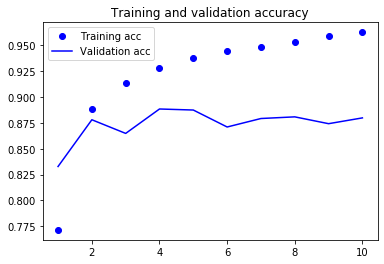

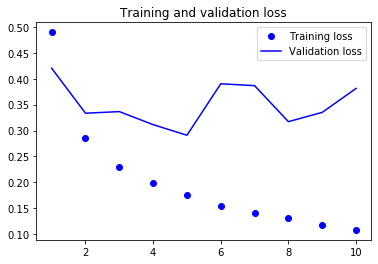

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)
print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()